In [1]:
#importing necessary libraries
#Basic libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # for regular expressions text cleaning



# Deep learning libraries - pytorch

import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn
import torch.nn as nn
from torch.optim import AdamW

# Hugging Face Transformers library

from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup

# Sklearn for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,classification_report,hamming_loss,accuracy_score

In [2]:
# To read the csv file for training data
df_train = pd.read_csv('C:/Users/mosel/Documents/PYTHON/deep_learning/train.csv',encoding='latin1')

In [3]:
df_train.shape

(159571, 8)

In [4]:
df_test = pd.read_csv('C:/Users/mosel/Documents/PYTHON/deep_learning/test.csv',encoding='latin1')

In [5]:
df_train.head

<bound method NDFrame.head of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe

In [6]:
df_test.head

<bound method NDFrame.head of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]>

In [7]:
df_train.describe

<bound method NDFrame.describe of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  se

In [8]:
#shape of the train and test data
df_train.shape
df_test.shape

(153164, 2)

1. Data cleaning

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
# To verify the null values in the dataset
df_train.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [11]:
# To verify duplicate values in the dataset

df_train.duplicated().sum()

np.int64(0)

In [12]:
# To remove the id column from the train and test data
df_train.drop(['id'], axis=1, inplace=True)
#df_test.drop(['id'], axis=1, inplace=True)

In [13]:


df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [14]:
df_train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


2.EDA

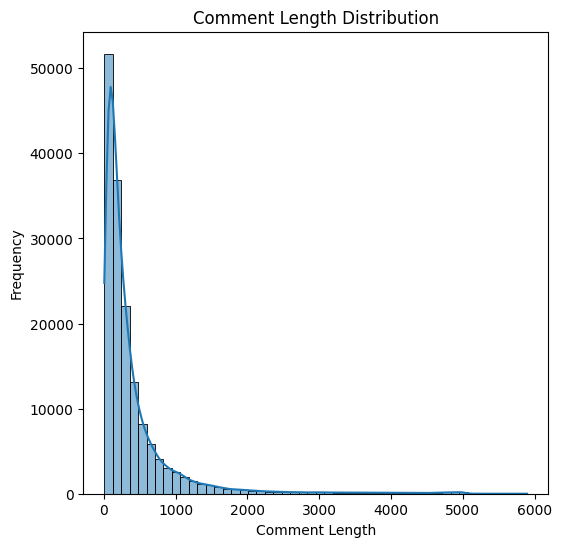

In [15]:
#Comment length and its histogram plot
df_train['comment_text'].str.len()
plt.figure(figsize=(6, 6))
sns.histplot(df_train['comment_text'].str.len(), bins=50, kde=True)
plt.title('Comment Length Distribution')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

 Comment Length Distribution

X-axis (Comment Length): Ranges from 0 to about 6000 characters.

Y-axis (Frequency): Peaks over 50,000 at the lowest lengths.

The distribution is right-skewed:

Most comments are very short (under 500 characters).

The frequency drops steeply as comment length increases.

A long tail indicates the presence of much longer comments, but these are rare.

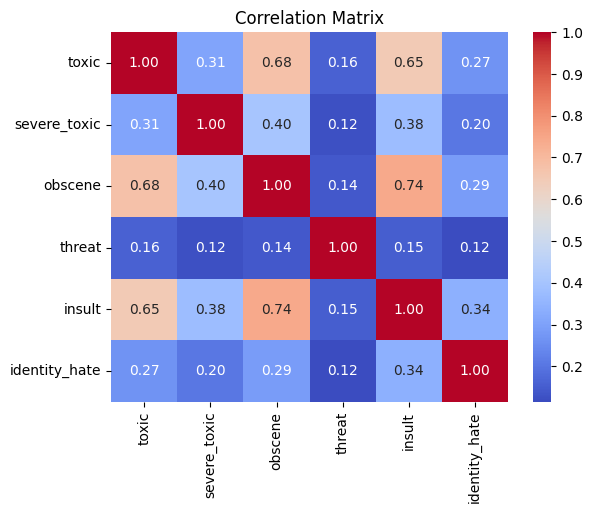

In [16]:
# correlation matrix

data = df_train.drop(['comment_text'], axis=1)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

toxic & insult	0.65	Strong positive correlation. Comments labeled as "toxic" are often also marked as "insult".

toxic & obscene	0.68	Strong positive correlation. Obscene language is commonly part of toxic comments.

toxic & severe_toxic	0.31	Moderate correlation. Not all toxic comments are considered severely toxic.

toxic & threat	0.16	Weak correlation. Most toxic comments are not threats.

toxic & identity_hate	0.27	Weak to moderate correlation. Some overlap exists but not strong.

 obscene & insult | 0.74 | Very strong correlation. Obscene comments are usually also insulting. |

| obscene & severe_toxic | 0.40 | Moderate correlation. Severe toxicity may often include obscene words. |

| severe_toxic & threat | 0.12 | Weak. Severe toxicity doesn't necessarily imply threats. |

| threat & any other label | ~0.12 - 0.16 | Consistently low correlations. Threats are a more distinct category. |

| identity_hate & others | Mostly ~0.20 - 0.34 | Weak to moderate. Some overlap but less predictable co-occurrence. |

In [27]:
# Rename the comment_text column to text
#df_train.rename(columns={'comment_text': 'text'}, inplace=True)

In [17]:
df_train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [18]:
#define target features

target_features = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [19]:
# calculate the feature counts and percentages

feature_counts = df_train[target_features].sum()
feature_precentages= (feature_counts / len(df_train)) * 100

# Create a DataFrame for the feature counts and percentages
feature_df = pd.DataFrame({
    'Count': feature_counts,
    'Percentage': feature_precentages
})
print(" Feature distribution in the training data:")
print(feature_df)



 Feature distribution in the training data:
               Count  Percentage
toxic          15294    9.584448
severe_toxic    1595    0.999555
obscene         8449    5.294822
threat           478    0.299553
insult          7877    4.936361
identity_hate   1405    0.880486


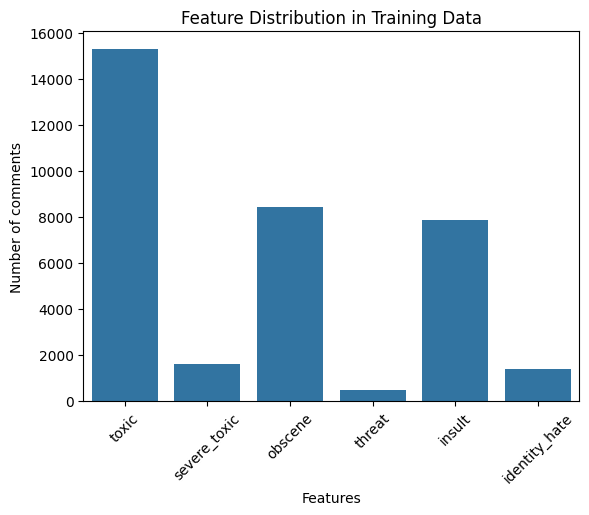

In [20]:
# Plotting the feature distribution

sns.barplot(x=feature_df.index.values, y='Count',data= feature_df)
plt.title('Feature Distribution in Training Data')
plt.ylabel('Number of comments')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [21]:
#Check for comments with no toxic features

non_toxic_comments = df_train[df_train[target_features].sum(axis=1) == 0]
print(f"\n Number of non-toxic comments: {len(non_toxic_comments)}")




 Number of non-toxic comments: 143346


In [22]:
# toxic comments
toxic_comments1 = df_train[df_train[target_features].sum(axis=1) > 0]
print(f"\n Number of toxic comments: {len(toxic_comments1)}")


 Number of toxic comments: 16225


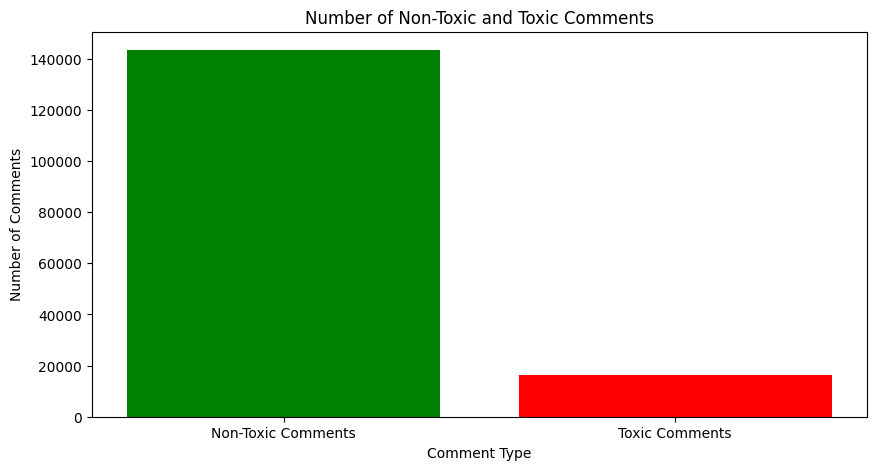

In [23]:
# plot non_toxic_comments and toxic comments before training the model

plt.figure(figsize=(10, 5))
plt.bar(['Non-Toxic Comments', 'Toxic Comments'], [len(non_toxic_comments), len(toxic_comments1)], color=['green', 'red'])
plt.title('Number of Non-Toxic and Toxic Comments')
plt.ylabel('Number of Comments')
plt.xlabel('Comment Type')
plt.show()

BERT

BERT (Bidirectional Encoder Representations from Transformers) is a powerful language representation model developed by Google in 2018.

It's based on the Transformer architecture, and it's designed to understand the context of a word bidirectionally — meaning it looks at both the left and right context in a sentence.

🔍 Key Features of BERT:

Bidirectional context:

Unlike previous models that read text left-to-right or right-to-left, BERT reads in both directions simultaneously.

Pre-trained and fine-tuned:

 BERT is pre-trained on a large corpus (like Wikipedia), then fine-tuned for specific tasks (e.g., sentiment analysis, question answering).

Transformer-based:

Built using the encoder part of the Transformer architecture, allowing it to handle long-range dependencies in text.

🧠 How BERT Works:

Pre-training tasks:

Masked Language Modeling (MLM):

Randomly masks words in the input and trains the model to predict them.

Next Sentence Prediction (NSP):

Trains the model to predict if one sentence follows another in context.

Fine-tuning:

After pre-training, BERT is adapted to specific tasks like classification, named entity recognition, or QA with a relatively small dataset.

3.Preprocessing and Tokenization ( BERT)

3.1 Text Cleaning

Text Cleaning for BERT Input
Before feeding text into a BERT model (like bert-base-uncased), minimal preprocessing is usually needed because BERT uses WordPiece tokenization and is designed to handle "messy" real-world text. Here's what you typically need:

✅ Recommended Text Cleaning for BERT:
Lowercasing (if using uncased models like bert-base-uncased)

Remove excessive whitespace

Replace HTML entities (&amp;, &lt;, etc.)

Normalize unicode (e.g., unicodedata.normalize)

Optionally: remove URLs/emails if irrelevant

❌ Do Not:
Do not remove stop words (they’re important for context)

Do not stem or lemmatize (BERT is subword-based)

Do not aggressively strip punctuation



In [24]:
df_train.shape

(159571, 7)

In [25]:
df_train = df_train.sample(n=10000, random_state=42)


In [26]:
df_test = df_test.sample(n=10000, random_state=42)


In [27]:
# 3.1 Text Cleaning (BERT)

def clean_text(text):

    text = str(text)  # Ensure text is a string
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'\s+', '', text).strip() # Remove mentions (To remove white spaces)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs

    return text
df_train['comment_text_cleaned'] = df_train['comment_text'].apply(clean_text)
df_test['comment_text_cleaned'] = df_test['comment_text'].apply(clean_text)




In [28]:
df_train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_cleaned
119105,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0,"Geez,areyouforgetful!We'vealreadydiscussedwhyM..."
131631,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0,CariocaRFAThanksforyoursupportonmyrequestforad...
125326,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0,"""BirthdayNoworries,It'swhatIdo;)Enjoyurday|tal..."
111256,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0,Pseudosciencecategory?I'massumingthatthisartic...
83590,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0,"(andifsuchphraseexists,itwouldbeprovidedbysear..."
...,...,...,...,...,...,...,...,...
25725,"Sam, get real! No-one's gunner believe all thi...",0,0,0,0,0,0,"Sam,getreal!No-one'sgunnerbelieveallthisstuffa..."
46449,Get a life \n\nwhy dont you go get a life and ...,1,0,0,0,1,0,Getalifewhydontyougogetalifeandstopeditingarti...
108844,"Nothing a sock puppet(and trust me, I know wha...",0,0,0,0,0,0,"Nothingasockpuppet(andtrustme,Iknowwhatitmeans..."
142353,"""\nThe lead section is a summary of the main p...",0,0,0,0,0,0,"""Theleadsectionisasummaryofthemainpoints,butit..."


3.2 Tokenization with BERT tokenizer

Tokenization with the BERT tokenizer is a key step in preparing text data for input into BERT models. Here's a concise overview of how it works:

🔹 What is Tokenization?

Tokenization is the process of splitting text into smaller units called tokens. BERT uses WordPiece tokenization, which breaks words into subword units.

🔹 BERT Tokenizer Characteristics

Lowercasing (optional): Converts text to lowercase (e.g., "Hello" → "hello") if using the bert-base-uncased model.

WordPiece Tokenizer: Splits unknown or rare words into subwords, prefixed with ## if they're a continuation of a word.

Special Tokens:

[CLS]: Classification token added at the beginning.

[SEP]: Separator token used between sentence pairs or at the end of a single sentence.

In [29]:
# 3.2 Tokenization with BERT tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#tokenizer = BertTokenizer.from_pretrained('C:/Users/mosel/.cache/huggingface/hub/models--bert-base-uncased')

sample_text ="Sample comment for tokenization"

encoded_sample = tokenizer.encode_plus(
    sample_text,
    add_special_tokens=True,
    max_length=35,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

"""def tokenize_text(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,  # Add [CLS] and [SEP] tokens
        max_length=50,  # Maximum length of the sequence
        padding='max_length',  # Pad to max_length
        truncation=True,  # Truncate if longer than max_length
        return_tensors='pt'  # Return PyTorch tensors
    )"""
"""print("\nSample Tokenization:")
print(f"Text: {sample_text}")
print(f"Tokens: {tokenizer.tokenize(sample_text)}")
print(f"Input IDs: {tokenizer.encode(sample_text, add_special_tokens=True)}")
print(f"Attention Mask: {tokenizer.encode(sample_text, add_special_tokens=True, padding='max_length', truncation=True, max_length=50)}") # 1 for real tokens, 0 for padding"""


print("\nSample Tokenization:")
print(f"Text: {sample_text}")
print(f"Tokens: {tokenizer.convert_ids_to_tokens(encoded_sample['input_ids'][0])}")
print(f"Input IDs: {encoded_sample['input_ids']}")
print(f"Attention Mask: {encoded_sample['attention_mask']}") # 1 for real tokens, 0 for padding"""





Sample Tokenization:
Text: Sample comment for tokenization
Tokens: ['[CLS]', 'sample', 'comment', 'for', 'token', '##ization', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs: tensor([[  101,  7099,  7615,  2005, 19204,  3989,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


3.3 Creating Pytorch Dataset and DataLoader

Creating a Dataset and DataLoader in PyTorch is essential for efficiently handling and feeding data into a model during training or evaluation.

In [30]:
# 3.3 Creating Pytorch Dataset and DataLoader

class ToxicCommentDataset(Dataset):


    def __init__(self, comments, targets, tokenizer, max_length):

        self.comments = comments
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.comments)
    def __getitem__(self, idx):
        comment = self.comments[idx]
        target = self.targets[idx]

        # Tokenize the comment
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Return the encoded inputs and target
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.float)
        }
#3.4 preparing the dataset and dataloader
# Define X and y
X = df_train['comment_text_cleaned'].values
y = df_train[target_features].values

# split the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Seed = 42 for reproducibility

# Print the Train size and validation size
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

# Create the datasets

train_dataset = ToxicCommentDataset(X_train, y_train, tokenizer, max_length= 128)# max_length can be adjusted based on the average length of comments
val_dataset = ToxicCommentDataset(X_val, y_val, tokenizer, max_length= 128)

# Create the DataLoaders

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Check the first batch of data

data = next(iter(train_loader))
print("\n sample batch data:")
print(f"Input IDs: {data['input_ids'].shape}")
print(f"Attention Mask: {data['attention_mask'].shape}")
print(f"Targets: {data['targets'].shape}")



Training set size: 8000
Validation set size: 2000

 sample batch data:
Input IDs: torch.Size([32, 128])
Attention Mask: torch.Size([32, 128])
Targets: torch.Size([32, 6])


4.Model Definition

BertForSequenceClassification = BERT + classification head

Automatically handles loss computation if labels are provided

Use with tokenized inputs: input_ids, attention_mask, and optional labels

In [31]:
# Load the pre-trained BERT model for sequence classification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(target_features))

# Move the model to designated device (GPU or CPU)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



model.to(device)

print(f"Model is running on: {device}")

print("\n Model loaded successfully!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model is running on: cpu

 Model loaded successfully!


5.Model Training

5.1 Setup Optimizer and Scheduler

The AdamW optimizer is the default optimizer used in most modern BERT implementations because it effectively handles weight decay.

🧠 Why AdamW with BERT?

BERT has LayerNorm and bias terms that should not have weight decay.

AdamW separates weight decay from gradient updates, which is correct behavior for L2 regularization in transformers.

In [32]:
#5.1 Optimizer and learning rate scheduler

# Optimizer
# (learning_rate(lr) = 2e-5 is a common choice for fine-tuning BERT)
# (Epsilon (eps) = 1e-8 is a small value to prevent division by zero in AdamW optimizer)

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Total number of training steps

total_steps = len(train_loader) * 3  # Assuming 5 epochs ( Epochs = 3)

# Learning rate scheduler
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,  # No warmup steps
    num_training_steps=total_steps
)
# Loss function #Sigmoid activation + Binary Cross Entropy (BCE) loss
loss_fn = nn.BCEWithLogitsLoss().to(device)  # Binary Cross-Entropy Loss for multi-label classification


5.2 Training Loop

📌 Key Concepts

Step	                Purpose
model.train()	      -     Enables training behaviors like dropout

optimizer.zero_grad() -	Clears previously accumulated gradients

loss.backward()	      -    Computes gradients via backpropagation

optimizer.step()	  -    Updates model parameters using optimizer

scheduler.step()	  -    Adjusts learning rate (optional)



In [33]:
# 5.2 Training Loop

def train_epoch(model, data_loader, loss_fn, optimizer, device, Scheduler):
    model.train()  # Set the model to training mode
    total_loss = 0
    num_batches = len(data_loader)

    for i , data in enumerate(data_loader):
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        targets = data['targets'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits # logits are the raw output scores from the model

        # Calculate loss
        loss = loss_fn(logits, targets)
        total_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad() # Reset gradients
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # Clip gradients to prevent exploding gradients
        optimizer.step()
        Scheduler.step()

        # Print progress every 100 batches

        if (i + 1) % 100 == 0:
            print(f"Batch {i + 1}/{num_batches}, Loss: {loss.item():.4f}")
    avg_train_loss = total_loss / num_batches
    print(f"Average Loss for this epoch: {avg_train_loss:.4f}")
    return avg_train_loss


5.3 Evaluation loop

The evaluation loop  runs the model on a validation or test dataset without
updating weights to measure performance.

✅ Purpose

Check model performance during or after training.

Compute metrics: loss, accuracy, F1, etc.

Ensure model.eval() is called to disable dropout, etc.

No gradients: We use torch.no_grad() for efficiency.

📌 Key Concepts

Step	                        Description

model.eval()	            -    Disables dropout, layernorm updates

torch.no_grad()	            -   Speeds up computation, avoids storing gradients

loss_fn(outputs, labels)    -   Same loss as training (e.g., BCEWithLogitsLoss)

torch.sigmoid(outputs) > 0.5 -	Converts logits to binary predictions



In [34]:
from sklearn.metrics import roc_auc_score, hamming_loss
import numpy as np
import torch

def eval_model(model, data_loader, loss_fn, device, target_features):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    all_targets = []
    all_predictions = []
    num_batches = len(data_loader)

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for data in data_loader:
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            targets = data['targets'].to(device)

            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            # Calculate loss
            loss = loss_fn(logits, targets)
            total_loss += loss.item()

            # Store predictions and true labels
            probs = torch.sigmoid(logits)
            all_predictions.append(probs.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

        avg_eval_loss = total_loss / num_batches
        print(f"Average Loss for this epoch: {avg_eval_loss:.4f}")

        # Concatenate results from all batches
        all_predictions = np.concatenate(all_predictions, axis=0)
        all_targets = np.concatenate(all_targets, axis=0)

        # Calculate metrics
        roc_auc_scores = {}
        mean_roc_auc = 0

        try:
            for i, label_name in enumerate(target_features):
                if len(np.unique(all_targets[:, i])) > 1:
                    roc_auc_scores[label_name] = roc_auc_score(all_targets[:, i], all_predictions[:, i])
                else:
                    roc_auc_scores[label_name] = np.nan

            # Calculate mean AUC, ignoring NaNs
            mean_roc_auc = np.nanmean(list(roc_auc_scores.values()))

            print(f"Mean ROC AUC: {mean_roc_auc:.4f}")
            print("Individual ROC AUC Scores:")
            for name, score in roc_auc_scores.items():
                print(f"{name}: {score:.4f}")

        except Exception as e:
            print(f"Could not calculate ROC AUC: {e}")

        # Calculate Hamming Loss
        threshold = 0.5
        binary_predictions = (all_predictions > threshold).astype(int)
        hamming = hamming_loss(all_targets, binary_predictions)
        print(f"Hamming Loss: {hamming:.4f}")

        return avg_eval_loss, mean_roc_auc, hamming

5.4 Execute training and Evaluation Loop

Trains a PyTorch model over multiple epochs.

Tracks and saves the best model (based on validation ROC AUC).

Loads the best model after training for future use.

In [ ]:
# 5.4 Execute training and Evaluation

result = {'train_loss': [],'eval_loss' : [],'eval_roc_auc':[],'eval_hamming':[]}
best_roc_auc = -1
best_model_state = None
print("\n Training Start")
for epoch in range(3):
     # Epoch = 3
    print(f'\n-----Epoch {epoch + 1}/{3}-----')

    train_loss=train_epoch(model,train_loader,loss_fn,optimizer, device,scheduler)

    result['train_loss'].append(train_loss)

    print(f"\n ----- validation Epoch {epoch + 1}-----")

    eval_loss, eval_roc_auc , eval_hamming = eval_model(model,val_loader,loss_fn,device,target_features)

    result['eval_loss'].append(eval_loss)
    result['eval_roc_auc'].append(eval_roc_auc)
    result['eval_hamming'].append(eval_hamming)

#Save the best model based on validation ROC AUC

    if eval_roc_auc > best_roc_auc:

      best_roc_auc = eval_roc_auc
      best_model_state = model.state_dict()
      torch.save(best_model_state, 'best_model_state.bin')
      print(f"----New best model saved with ROC AUC:{best_roc_auc:.4f}----")
print("\n Training Finished.")
print(f"Best Validation ROC AUC: {best_roc_auc:4f}")

#Load the best model state for prediction
if best_model_state:
    model.load_state_dict(best_model_state)
    print("Load best model state for prediction.")





 Training Start

-----Epoch 1/3-----
Batch 100/250, Loss: 0.1283
Batch 200/250, Loss: 0.1758
Average Loss for this epoch: 0.1569

 ----- validation Epoch 1-----
Average Loss for this epoch: 0.0994
Mean ROC AUC: 0.7906
Individual ROC AUC Scores:
toxic: 0.9011
severe_toxic: 0.8954
obscene: 0.9421
threat: 0.1968
insult: 0.9042
identity_hate: 0.9038
Hamming Loss: 0.0272
----New best model saved with ROC AUC:0.7906----

-----Epoch 2/3-----
Batch 100/250, Loss: 0.0526
Batch 200/250, Loss: 0.0268
Average Loss for this epoch: 0.0802

 ----- validation Epoch 2-----
Average Loss for this epoch: 0.0818
Mean ROC AUC: 0.8921
Individual ROC AUC Scores:
toxic: 0.9323
severe_toxic: 0.9465
obscene: 0.9727
threat: 0.5859
insult: 0.9539
identity_hate: 0.9613
Hamming Loss: 0.0253
----New best model saved with ROC AUC:0.8921----

-----Epoch 3/3-----
Batch 100/250, Loss: 0.1505
Batch 200/250, Loss: 0.0746
Average Loss for this epoch: 0.0610

 ----- validation Epoch 3-----
Average Loss for this epoch: 0.075

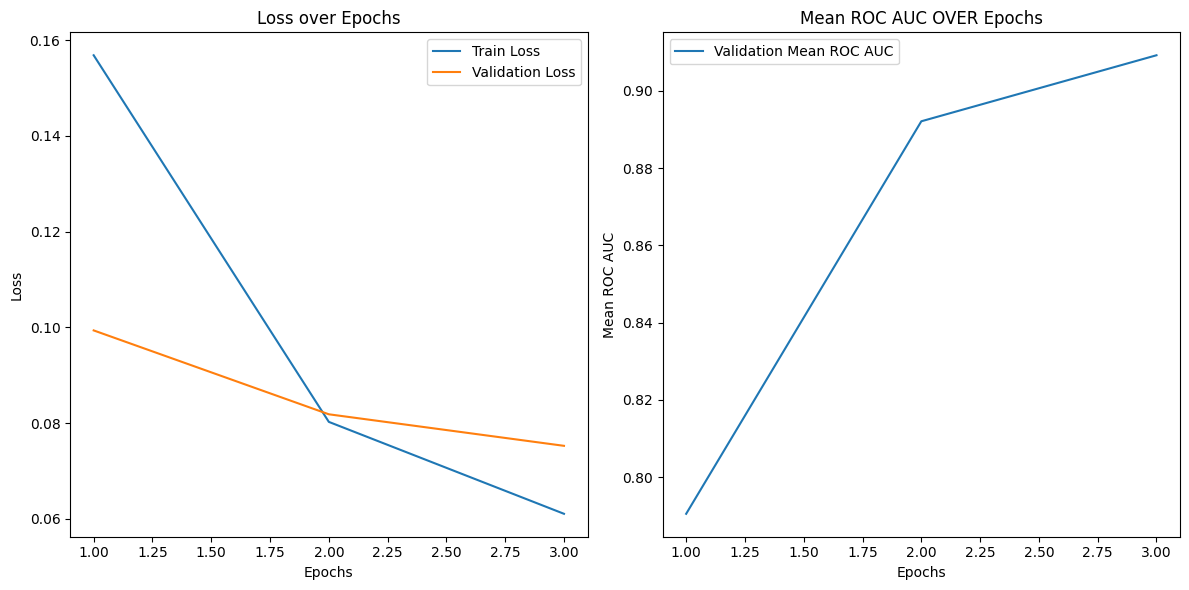

In [ ]:
#5.5 Plot Training History

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(1,3+1),result['train_loss'],label='Train Loss')
plt.plot(range(1,3+1),result['eval_loss'],label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,3+1),result['eval_roc_auc'],label='Validation Mean ROC AUC')
plt.title('Mean ROC AUC OVER Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean ROC AUC')
plt.legend()

plt.tight_layout()
plt.show()

6.Prediction on Test Set

Use the trained (best) model to generate predictions on the unseen test data.

6.1 Prepare test Data Loader


Create a Dataset and DataLoader for the test set, similar to the training/

validation sets, but without labels.





In [ ]:
# Dataset and DataLoader for the test set

class TestCommentDataset(Dataset):
    def __init__(self, comments, tokenizer, max_len):
        self.comments = comments
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, item):
        comment = str(self.comments[item])

        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
        }

test_texts = df_test['comment_text_cleaned'].values
test_dataset = TestCommentDataset(test_texts, tokenizer, 128)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)

6.2 Generate Predictions

Run the model in evaluation mode on the test data loader

In [ ]:
def predict(model, data_loader, device):

    model.eval()
    predictions = []
    print("\nGenerating predictions on test data...")
    with torch.no_grad():
        for data in data_loader:
            input_ids = data["input_ids"].to(device)
            attention_mask = data["attention_mask"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            logits = outputs.logits
            probs = torch.sigmoid(logits) # Convert logits to probabilities (0-1 range)
            predictions.append(probs.cpu().numpy())

    return np.concatenate(predictions, axis=0)

test_predictions = predict(model, test_dataloader, device)
print("Predictions generated successfully.")
print("Shape of predictions:", test_predictions.shape) # Should be (num_test_samples, num_labels)


Generating predictions on test data...
Predictions generated successfully.
Shape of predictions: (10000, 6)


6.3 Format submission File

In [ ]:
#target_features

# Create submission DataFrame
submission_df = pd.DataFrame(test_predictions, columns=target_features)
submission_df['id'] = df_test['id'] # Add the id column

# Reorder columns to match sample_submission.csv format ('id' first, then label columns)
submission_df = submission_df[['id'] + target_features]

print("\nSubmission DataFrame Head:")
print(submission_df.head())

# Save to CSV
submission_df.to_csv('submission.csv', index=False)

print("\n Submission file 'submission.csv' created successfully.")




Submission DataFrame Head:
    id     toxic  severe_toxic   obscene    threat    insult  identity_hate
0  NaN  0.016006      0.005539  0.007353  0.005603  0.009312       0.006054
1  NaN  0.020613      0.004909  0.008092  0.004786  0.009977       0.005810
2  NaN  0.022752      0.004881  0.008269  0.004613  0.010383       0.005855
3  NaN  0.938598      0.231614  0.864616  0.077127  0.765073       0.186564
4  NaN  0.922554      0.176542  0.819445  0.057149  0.701248       0.144156

 Submission file 'submission.csv' created successfully.


In [ ]:
%%writefile toxic_app.py
import streamlit as st
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

# Define the target labels
target_features = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Load tokenizer and model
@st.cache_resource
def load_model():
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(target_features))
    model.load_state_dict(torch.load('best_model_state.bin', map_location=torch.device('cpu')))
    model.eval()
    return tokenizer, model

tokenizer, model = load_model()

# Streamlit UI
st.title("🧪 Toxic Comment Classifier")
st.write("Enter a comment below to check its toxicity level.")

user_input = st.text_area("✏️ Your Comment", height=150)

if st.button("🔍 Predict"):
    if not user_input.strip():
        st.warning("Please enter a comment.")
    else:
        with st.spinner("Analyzing..."):
            encoded = tokenizer.encode_plus(
                user_input,
                add_special_tokens=True,
                max_length=128,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )

            input_ids = encoded['input_ids']
            attention_mask = encoded['attention_mask']

            with torch.no_grad():
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                probs = torch.sigmoid(outputs.logits).cpu().numpy()[0]

            st.success("Prediction complete!")

            st.subheader("🧾 Toxicity Scores")
            for label, score in zip(target_features, probs):
                st.write(f"**{label}**: {score:.4f} {'✅' if score < 0.5 else '⚠️'}")

Writing toxic_app.py


In [ ]:
#pip install streamlit

In [ ]:
#Make sure to install these in your environment:


#!pip install streamlit transformers torch

In [ ]:
#In the terminal, run:
#You can't run the Streamlit UI inside a Jupyter Notebook.
# But you can launch it in a new browser tab from a notebook cell using:
#e.g This will start the Streamlit app and give you a link like http://localhost:8501.



!streamlit run toxic_app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.203.185.145:8501

